# Fase 4: Modeling

## Funciones auxiliares









Función para mostrar los resultados obtenidos en los modelos de regresion

In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

metricas_por_modelo = []

# Función para imprimir métricas obtenidas por el modelo
def metricas_regresion(X_test, y_test, X_train, y_train, y_pred, modelo_objeto, nombre_modelo="Regresión Lineal"):
    test_score = modelo_objeto.score(X_test, y_test)
    train_score = modelo_objeto.score(X_train, y_train)
    r2 = r2_score(y_true=y_test, y_pred=y_pred)
    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
    rmse = np.sqrt(mse)

    metricas_por_modelo.append([nombre_modelo, test_score, train_score, r2, mae, mse, rmse])

    print(f"🔎 Métricas para el modelo {nombre_modelo}:")
    print(f"- Test Score: {test_score:.4f}")
    print(f"- Train Score: {train_score:.4f}")
    print(f"- R²: {r2:.4f}")
    print(f"- MAE: {mae:.4f}")
    print(f"- MSE: {mse:.4f}")
    print(f"- RMSE: {rmse:.4f}\n")


Función para graficar los residuos obtenidos de nuestra modelo.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_residuos(y_true, y_pred, nombre_modelo="Modelo"):
    residuos = y_true - y_pred

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_pred, y=residuos, alpha=0.7, color="teal")
    plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
    plt.title(f"Gráfico de residuos - {nombre_modelo}")
    plt.xlabel("Predicciones")
    plt.ylabel("Residuos (y_true - y_pred)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Función para graficar la regresión obtenida desde el modelo

In [7]:
def plot_regresion(y_true, y_pred, nombre):
  plt.figure(figsize=(8, 5))
  plt.scatter(y_true, y_pred, color="teal", alpha=0.7)
  plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
  plt.title(f'Gráfico de Regresión - {nombre}')
  plt.xlabel('Valores Reales')
  plt.ylabel('Predicciones')
  plt.tight_layout()
  plt.show()

Función para exportar y guardar el modelo ya entrenado

In [9]:
import joblib
import os

def guardar_modelo(modelo, nombre_modelo):
    """
    Guarda el modelo serializado en formato .pkl en Google Drive.

    Parámetros:
    - modelo: objeto del modelo entrenado
    - nombre_modelo: nombre del archivo a guardar (sin extensión)
    """
    ruta_directorio = '../models_ML'
    ruta_modelo = os.path.join(ruta_directorio, f'{nombre_modelo}.pkl')

    # Crear carpeta si no existe
    os.makedirs(ruta_directorio, exist_ok=True)

    # Guardar el modelo
    joblib.dump(modelo, ruta_modelo)
    print(f"Modelo guardado exitosamente en: {ruta_modelo}")

## Aprendizaje Supervisado - Regresión

Los modelos de regresión son técnicas estadísticas y de aprendizaje automático que permiten analizar la relación entre una variable dependiente (o variable de salida) y una o más variables independientes (o predictoras). Su objetivo principal es predecir el valor de la variable dependiente a partir de los valores conocidos de las variables independientes.








Cargamos el dataset ya preparado para los modelos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
ds_reg = pd.read_csv('../data/data_lista.csv')
ds_reg.head()

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0  0.543424  0.523629  0.001617       0.413043      0.370370      0.421053   
1  0.394541  0.565217  0.000000       0.413043      0.074074      0.385965   
2  0.531017  0.576560  0.000000       0.434783      0.351852      0.456140   
3  0.439206  0.620038  0.000000       0.195652      0.203704      0.157895   
4  0.645161  0.701323  0.002695       0.380435      0.129630      0.350877   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  RainToday  \
0         0.71         0.22     0.390741     0.392523  ...        0.0   
1         0.44         0.25     0.444444     0.405607  ...        0.0   
2         0.38         0.30     0.388889     0.422430  ...        0.0   
3         0.45         0.16     0.574074     0.499065  ...        0.0   
4         0.82         0.33     0.448148     0.371963  ...        0.0   

    RISK_MM  RainTomorrow  Location_le  Risk_MM_cat_le  Rainfall_cat_le  \
0  0.000000           0.0     0.041667             1.0              1.0   
1  0.000000           0.0     0.041667             1.0              1.0   
2  0.000000           0.0     0.041667             1.0              1.0   
3  0.002695           0.0     0.041667             1.0              1.0   
4  0.000539           0.0     0.041667             1.0              1.0   

   Estacion_le  WindGustDir_le  WindDir9am_le  WindDir3pm_le  
0          1.0          0.8125         0.8125         0.8750  
1          1.0          0.8750         0.3750         0.9375  
2          1.0          0.9375         0.8125         0.9375  
3          1.0          0.2500         0.5625         0.0000  
4          1.0          0.8125         0.0625         0.4375  

[5 rows x 24 columns]

Filtramos el dataset con las variables más importantes para nuestra variable objetivo MaxTemp definidas en la Fase 3. Además agregamos las variables Location y Estacion.

In [13]:
ds_reg = ds_reg[['Temp3pm',
    'Temp9am',
    'MinTemp',
    'Humidity9am',
    'Humidity3pm',
    'Estacion_le',
    'Pressure3pm',
    'Location_le', 'MaxTemp']]

ds_reg.head()

Temp3pm   Temp9am   MinTemp  Humidity9am  Humidity3pm  Estacion_le  \
0  0.528155  0.518438  0.543424         0.71         0.22          1.0   
1  0.576699  0.524946  0.394541         0.44         0.25          1.0   
2  0.555340  0.607375  0.531017         0.38         0.30          1.0   
3  0.619417  0.544469  0.439206         0.45         0.16          1.0   
4  0.681553  0.537961  0.645161         0.82         0.33          1.0   

   Pressure3pm  Location_le   MaxTemp  
0     0.392523     0.041667  0.523629  
1     0.405607     0.041667  0.565217  
2     0.422430     0.041667  0.576560  
3     0.499065     0.041667  0.620038  
4     0.371963     0.041667  0.701323

Separamos las variables predictoras y la variable objetivo

In [15]:
target_regresion = 'MaxTemp'
features_regresion = [
    'MinTemp',
    'Temp3pm',
    'Humidity3pm',
    'Pressure3pm',
    'Estacion_le',
    'Location_le'
]

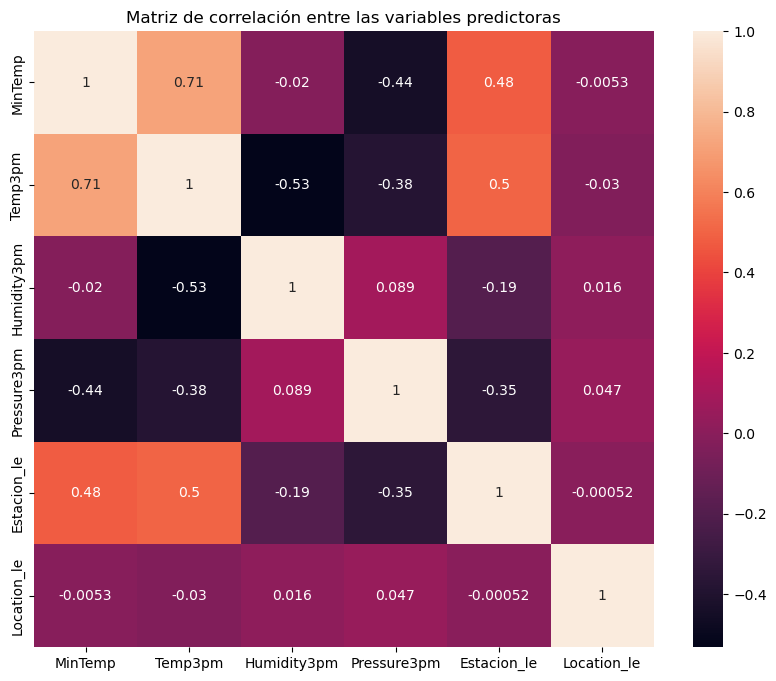

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(ds_reg[features_regresion].corr(), annot=True)
plt.title('Matriz de correlación entre las variables predictoras')
plt.show()

Asignamos un "random state" para reproducibilidad

In [19]:
# Random State
rs = 123

In [21]:
X = ds_reg[features_regresion]
y = ds_reg[target_regresion]

In [23]:
X.head()

MinTemp   Temp3pm  Humidity3pm  Pressure3pm  Estacion_le  Location_le
0  0.543424  0.528155         0.22     0.392523          1.0     0.041667
1  0.394541  0.576699         0.25     0.405607          1.0     0.041667
2  0.531017  0.555340         0.30     0.422430          1.0     0.041667
3  0.439206  0.619417         0.16     0.499065          1.0     0.041667
4  0.645161  0.681553         0.33     0.371963          1.0     0.041667

In [25]:
X.skew()

MinTemp        0.017291
Temp3pm        0.232674
Humidity3pm   -0.011277
Pressure3pm    0.052934
Estacion_le    0.043427
Location_le    0.015692
dtype: float64

In [27]:
y.head()

0    0.523629
1    0.565217
2    0.576560
3    0.620038
4    0.701323
Name: MaxTemp, dtype: float64

In [29]:
y.skew()

0.22576161750076118

Separamos los datos en variables de train y test usando train_test_split de sklearn. Dejaremos un 30% de para nuestro dataset de testing.

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)

In [33]:
print("Tamaño de X_train_reg:", X_train.shape)
print("Tamaño de y_train_reg:", y_train.shape)
print("Tamaño de X_test_reg:", X_test.shape)
print("Tamaño de y_test_reg:", y_test.shape)

Tamaño de X_train_reg: (99533, 6)
Tamaño de y_train_reg: (99533,)
Tamaño de X_test_reg: (42657, 6)
Tamaño de y_test_reg: (42657,)


## Regresión de Ridge (L2) con GridSearchCV¶

El modelo de regresión Ridge es una variante de la regresión lineal que incorpora una penalización (regularización L2) para reducir el sobreajuste y mejorar la generalización del modelo, especialmente cuando hay muchas variables predictoras o multicolinealidad. Esta penalización agrega un término al error cuadrático que castiga los coeficientes grandes, forzándolos a ser más pequeños y estables.

Al usar GridSearchCV, se automatiza la búsqueda del mejor valor del hiperparámetro de regularización (alpha), probando múltiples combinaciones en un proceso de validación cruzada. Esto permite seleccionar el modelo con el mejor rendimiento de forma más robusta y optimizada, evaluando el ajuste del modelo en diferentes subconjuntos de los datos para evitar el sobreajuste y mejorar la precisión en datos no vistos.

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

Usaremos valores de alpha desde 0.001 a 1000

In [37]:
np.logspace(-3, 3, 7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [39]:
# Hiperparámetros a probar
param_grid = {
    'alpha': np.logspace(-3, 3, 7)  # valores de alpha: desde 0.001, 0.01, 1, 10, 100, 1000
}

In [41]:
# Modelo
ridge = Ridge()

In [43]:
# GridSearch con 5 folds de cross validation
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Entrenamos
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='neg_mean_squared_error')

Los resultados de GridSearchCV muestran que el mejor valor para el hiperparámetro de regularización alpha en el modelo Ridge fue 0.01, lo que indica un nivel bajo de penalización. El mejor desempeño del modelo durante la validación cruzada se obtuvo con un error cuadrático medio negativo (neg MSE) de -0.000648, lo que refleja un ajuste preciso. Al tomar la raíz cuadrada de este valor, se obtiene un RMSE (error cuadrático medio de validación) de aproximadamente 0.0255, lo que confirma que el modelo tiene una buena capacidad de predicción con errores bajos y consistentes.

In [45]:
# Resultados de GridSearch
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score (neg MSE):", grid_search.best_score_)
print("Mejor RMSE (CV):", np.sqrt(-grid_search.best_score_))

Mejores parámetros: {'alpha': 0.01}
Mejor score (neg MSE): -0.0006465281061768736
Mejor RMSE (CV): 0.025426916961693833


In [47]:
# Mejor modelo
best_model_ridge = grid_search.best_estimator_
best_model_ridge

Ridge(alpha=0.01)

In [49]:
# Predecimos
y_pred_ridge = best_model_ridge.predict(X_test)

In [51]:
# Imprimimos las métricas
metricas_regresion(
    X_test,
    y_test,
    X_train,
    y_train,
    y_pred_ridge,
    best_model_ridge,
    "Ridge GridSearchCV"
)

🔎 Métricas para el modelo Ridge GridSearchCV:
- Test Score: 0.9644
- Train Score: 0.9635
- R²: 0.9644
- MAE: 0.0153
- MSE: 0.0006
- RMSE: 0.0250



Revisamos el gráfico de residuos y confirmamos que es muy similar al de Regresión lineal simple multivariable.

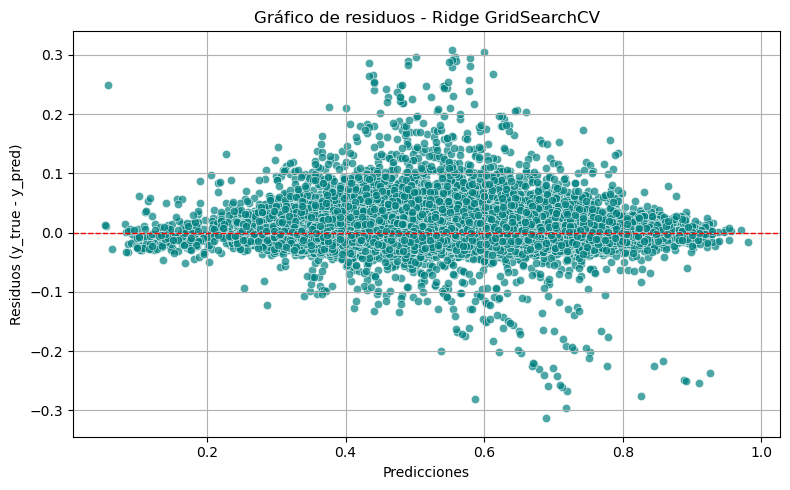

In [53]:
plot_residuos(y_test, y_pred_ridge, "Ridge GridSearchCV")

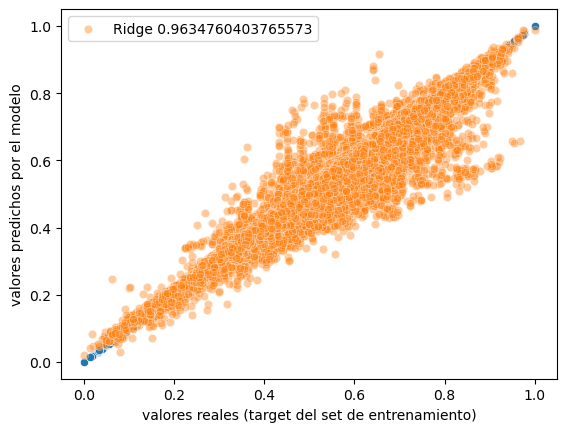

In [55]:
sns.scatterplot(x=y_train, y=y_train)
sns.scatterplot(x=y_train, y=best_model_ridge.predict(X_train), alpha=.4,label=f'Ridge {best_model_ridge.score(X_train, y_train)}')
plt.xlabel("valores reales (target del set de entrenamiento)")
plt.ylabel("valores predichos por el modelo")
plt.show()

## Árbol de Decisión de regresión con GridSearchCV

Un Árbol de Decisión de regresión es un modelo de aprendizaje supervisado que divide los datos en ramas según sus características, con el objetivo de predecir un valor numérico continuo. A diferencia de los árboles de clasificación, que predicen categorías, en este caso el modelo estima un valor real, como la temperatura o el precio de una vivienda.

Para mejorar el rendimiento del modelo, se puede utilizar GridSearchCV, una técnica que permite buscar de manera exhaustiva la mejor combinación de hiperparámetros (como la profundidad máxima del árbol o el número mínimo de muestras por hoja). Esta búsqueda se realiza mediante validación cruzada, evaluando múltiples combinaciones y seleccionando aquella que produce el mejor resultado en términos de precisión o error en los datos de validación. Así, se logra optimizar el modelo y reducir el riesgo de sobreajuste.








Importamos el modelo de arbol de decisión de regresión

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Hiperparámetros a probar
param_tree = {
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': ['sqrt', 'log2']
}

In [59]:
# Modelo
tree = DecisionTreeRegressor(random_state=rs)

In [61]:
# GridSearch con 5 folds de cross validation
grid_tree = GridSearchCV(
    estimator=tree,
    param_grid=param_tree,
    cv=5,
    n_jobs=-1
)

# Entrenamos
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30, 40, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [63]:
# Resultados de GridSearch
print("Mejores parámetros:", grid_tree.best_params_)
print("Mejor score (neg MSE):", grid_tree.best_score_)
print("Mejor RMSE (CV):", np.sqrt(grid_tree.best_score_))

Mejores parámetros: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}
Mejor score (neg MSE): 0.9523005940319734
Mejor RMSE (CV): 0.9758589006777432


In [65]:
# Modelo con los mejores parámetros
best_tree = grid_tree.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=10,
                      random_state=123)

In [67]:
# Predecimos con el modelo de mejor rendimiento
y_pred_tree = best_tree.predict(X_test)

In [69]:
# Imprimimos los resultados obtenidos
metricas_regresion(
    X_test,
    y_test,
    X_train,
    y_train,
    y_pred_tree,
    best_tree,
    "Árbol de decisión GridSearchCV"
)

🔎 Métricas para el modelo Árbol de decisión GridSearchCV:
- Test Score: 0.9494
- Train Score: 0.9652
- R²: 0.9494
- MAE: 0.0196
- MSE: 0.0009
- RMSE: 0.0298



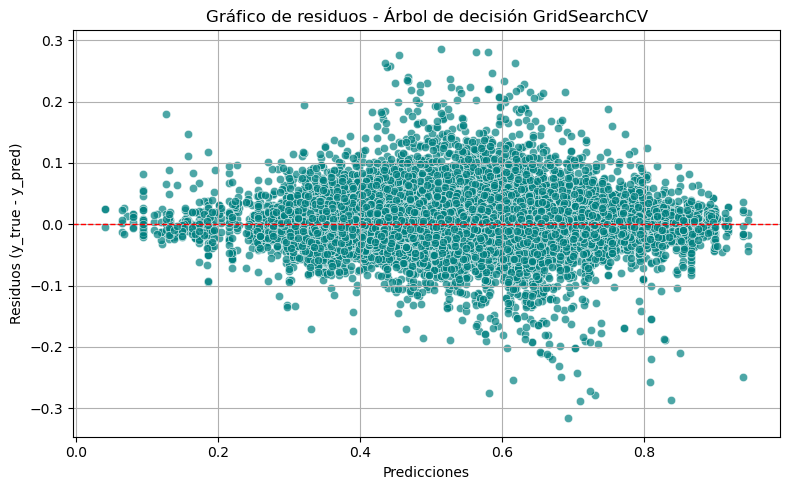

In [71]:
plot_residuos(y_test, y_pred_tree, "Árbol de decisión GridSearchCV")

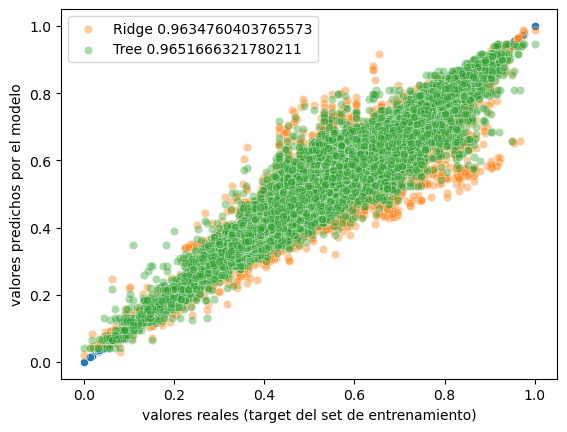

In [73]:
sns.scatterplot(x=y_train, y=y_train)
sns.scatterplot(x=y_train, y=best_model_ridge.predict(X_train), alpha=.4,label=f'Ridge {best_model_ridge.score(X_train, y_train)}')
sns.scatterplot(x=y_train, y=best_tree.predict(X_train), alpha=.4,label=f'Tree {best_tree.score(X_train, y_train)}')
plt.xlabel("valores reales (target del set de entrenamiento)")
plt.ylabel("valores predichos por el modelo")
plt.show()

## Random Forest GridSearchCV

In [75]:
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo base
rf = RandomForestRegressor(random_state=rs)

rf_params = {
    'n_estimators': [100, 200, 300],         # número de árboles
    'max_depth': [10, 20, 30],               # profundidad máxima
    'min_samples_split': [2, 5, 10],         # mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],           # mínimo de muestras por hoja
    'max_features': ['sqrt', 'log2']         # número de features consideradas en cada split
}

# Crear GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=rf_params,
                           cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2, error_score='raise')


# Entrenar
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, error_score='raise',
             estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=2)

In [77]:
# Resultados de GridSearch
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score (neg MSE):", grid_search.best_score_)
print("Mejor RMSE (CV):", np.sqrt(-grid_search.best_score_))

Mejores parámetros: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Mejor score (neg MSE): -0.01476313821659285
Mejor RMSE (CV): 0.1215036551573361


In [79]:
# Modelo con los mejores parámetros
best_rf = grid_search.best_estimator_
best_rf

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=300, random_state=123)

In [81]:
# Predecimos con el modelo de mejor rendimiento
y_pred_rf = best_rf.predict(X_test)

In [83]:
# Imprimimos los resultados obtenidos
metricas_regresion(
    X_test,
    y_test,
    X_train,
    y_train,
    y_pred_rf,
    best_rf,
    "Random Forest GridSearchCV"
)

🔎 Métricas para el modelo Random Forest GridSearchCV:
- Test Score: 0.9682
- Train Score: 0.9874
- R²: 0.9682
- MAE: 0.0146
- MSE: 0.0006
- RMSE: 0.0237



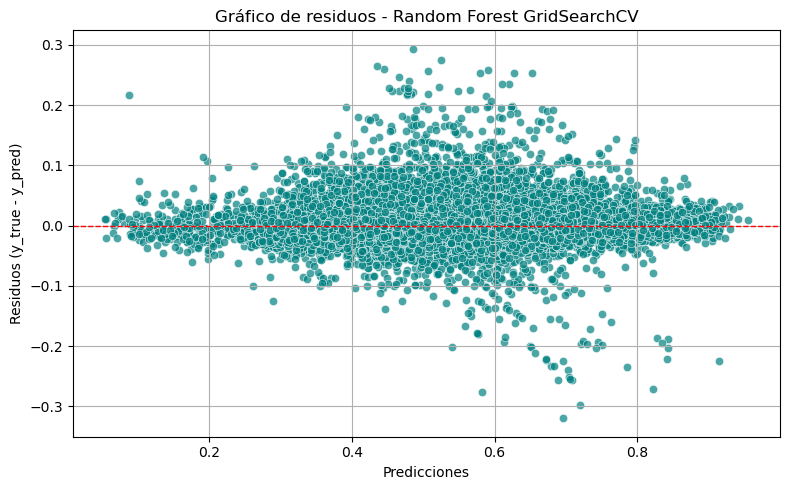

In [85]:
plot_residuos(y_test, y_pred_rf, "Random Forest GridSearchCV")

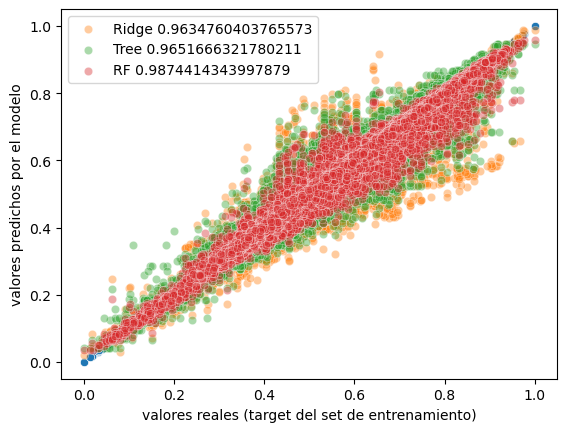

In [87]:
sns.scatterplot(x=y_train, y=y_train)
sns.scatterplot(x=y_train, y=best_model_ridge.predict(X_train), alpha=.4,label=f'Ridge {best_model_ridge.score(X_train, y_train)}')
sns.scatterplot(x=y_train, y=best_tree.predict(X_train), alpha=.4,label=f'Tree {best_tree.score(X_train, y_train)}')
sns.scatterplot(x=y_train, y=best_rf.predict(X_train), alpha=.4,label=f'RF {best_rf.score(X_train, y_train)}')
plt.xlabel("valores reales (target del set de entrenamiento)")
plt.ylabel("valores predichos por el modelo")
plt.show()

### Comparación de residuos

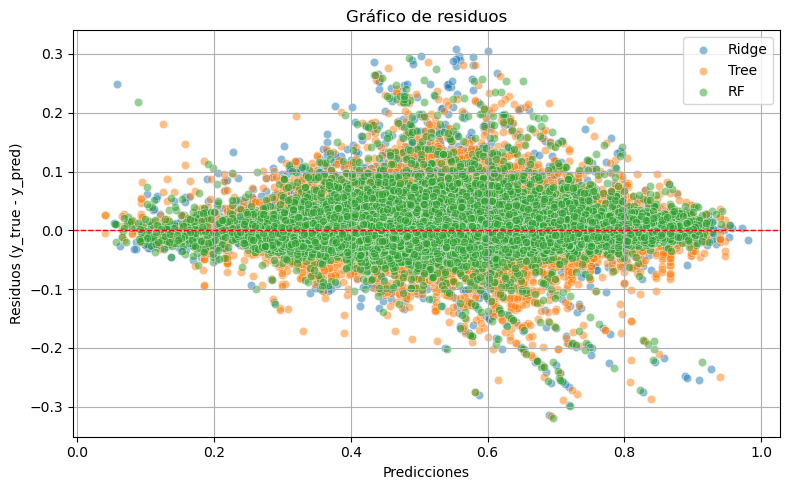

In [89]:
residuo_ridge = y_test - y_pred_ridge
residuo_dt = y_test - y_pred_tree
residuo_rf = y_test - y_pred_rf

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_ridge, y=residuo_ridge, alpha=0.5, label='Ridge')
sns.scatterplot(x=y_pred_tree, y=residuo_dt, alpha=0.5, label='Tree')
sns.scatterplot(x=y_pred_rf, y=residuo_rf, alpha=0.5, label='RF')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title(f"Gráfico de residuos")
plt.xlabel("Predicciones")
plt.ylabel("Residuos (y_true - y_pred)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [91]:
metricas_por_modelo_df = pd.DataFrame(
    metricas_por_modelo,
    columns=[
        "Modelo",
        "Test Score",
        "Train Score",
        "R2",
        "MAE",
        "MSE",
        "RMSE"
    ]
)

metricas_por_modelo_df

Modelo  Test Score  Train Score        R2  \
0              Ridge GridSearchCV    0.964446     0.963476  0.964446   
1  Árbol de decisión GridSearchCV    0.949401     0.965167  0.949401   
2      Random Forest GridSearchCV    0.968163     0.987441  0.968163   

        MAE       MSE      RMSE  
0  0.015317  0.000625  0.025004  
1  0.019558  0.000890  0.029829  
2  0.014561  0.000560  0.023661

In [93]:
metricas_por_modelo_df.to_csv('../metrics/regression/metricas_modelos_regresion.csv', index=False)

# Fase 5: Evaluation

A continuación procederemos a evaluar y comparar los modelos de regresión y de clasificación, con el fin de elegir el mejor modelo para cada tarea según el rendimiento obtenido por cada uno de estos

Primero analizaremos los modelos de regresión para poder seleccionar el mejor. Para realizaremos un análisis detallado de su desempeño utilizando diversas métricas de evaluación.

Nos enfocaremos en el coeficiente de determinación (R²), que mide qué tan bien el modelo explica la variabilidad de los datos, asegurándonos de que tenga una capacidad predictiva sólida.

Además, consideraremos el error absoluto medio (MAE), que nos da una idea del margen de error promedio de las predicciones, y el error cuadrático medio (MSE), que penaliza los errores grandes con más severidad.

Finalmente, evaluaremos el raíz del error cuadrático medio (RMSE), una métrica intuitiva que facilita la interpretación de la magnitud del error en la misma escala de los datos originales.

Este análisis nos permitirá comparar objetivamente los modelos y seleccionar el que ofrezca la mejor precisión y generalización para los datos disponibles.

In [95]:
df_metricas = metricas_por_modelo_df.drop(columns=['Test Score', 'Train Score'])

In [97]:
df_metricas

Modelo        R2       MAE       MSE      RMSE
0              Ridge GridSearchCV  0.964446  0.015317  0.000625  0.025004
1  Árbol de decisión GridSearchCV  0.949401  0.019558  0.000890  0.029829
2      Random Forest GridSearchCV  0.968163  0.014561  0.000560  0.023661

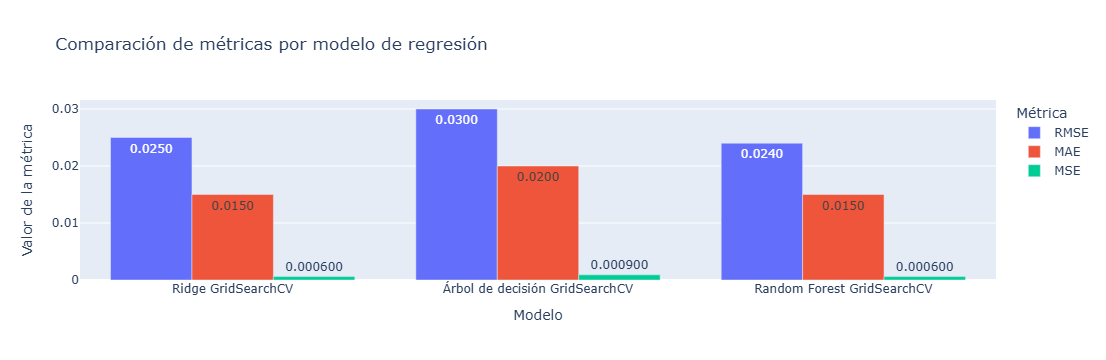

In [99]:
import plotly.graph_objects as go

# Datos
modelos = df_metricas['Modelo'].tolist()

mae =   df_metricas['MAE'].round(3).tolist()
mse =   df_metricas['MSE'].round(4).tolist()
rmse =  df_metricas['RMSE'].round(3).tolist()

# Crear figura
fig = go.Figure()

fig.add_trace(go.Bar(name="RMSE", x=modelos, y=rmse, text=[f"{v:.4f}" for v in rmse], textposition="auto"))
fig.add_trace(go.Bar(name="MAE", x=modelos, y=mae, text=[f"{v:.4f}" for v in mae], textposition="auto"))
fig.add_trace(go.Bar(name="MSE", x=modelos, y=mse, text=[f"{v:.6f}" for v in mse], textposition="auto"))


# Layout
fig.update_layout(
    barmode='group',
    title="Comparación de métricas por modelo de regresión",
    xaxis_title="Modelo",
    yaxis_title="Valor de la métrica",
    legend_title="Métrica",
    height=500
)

fig.show()


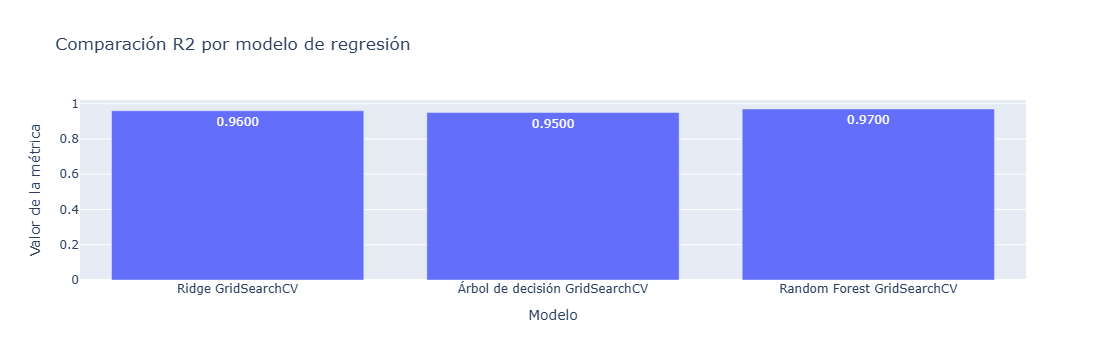

In [101]:
import plotly.graph_objects as go

# Datos
modelos = df_metricas['Modelo'].tolist()

r2 = df_metricas['R2'].round(2).tolist()

# Crear figura
fig = go.Figure()

fig.add_trace(go.Bar(name="R²", x=modelos, y=r2, text=[f"{v:.4f}" for v in r2], textposition="auto"))

# Layout
fig.update_layout(
    #barmode='group',
    title="Comparación R2 por modelo de regresión",
    xaxis_title="Modelo",
    yaxis_title="Valor de la métrica",
    legend_title="Métrica",
    height=500
)

fig.show()

Exportamos los 2 mejores modelos 

In [103]:
guardar_modelo(best_model_ridge, "ridge_regression")

Modelo guardado exitosamente en: ../models_ML\ridge_regression.pkl


Ejemplo de predicción

In [149]:
from sklearn.preprocessing import MinMaxScaler

target = pd.read_csv('../data/data_cat.csv')

scaler_y = MinMaxScaler()
scaler_y.fit(target[['MaxTemp']])
joblib.dump(scaler_y, "../models_ML/scaler_target.pkl")

['../models_ML/scaler_target.pkl']

In [157]:
# columnas originales en el mismo orden
cols = ['MinTemp', 'Temp3pm', 'Humidity3pm', 'Pressure3pm', 'Estacion_le', 'Location_le']

# Creamos el input como DataFrame
input_df = pd.DataFrame([[0.58312655, 0.53203883, 0.5, 0.25981308, 0., 0.]], columns=cols)

# Predicción del modelo (todavía en escala normalizada)
prediction_scaled = best_model_ridge.predict(input_df).reshape(-1, 1)

# Desnormalización manual
prediction_original = scaler_y.inverse_transform(prediction_scaled)

print(f"Temperatura máxima predicha: {prediction_original[0][0]:.2f}°C")

Temperatura máxima predicha: 23.64°C


In [184]:
guardar_modelo(best_rf, "random_forest_regression")

Modelo guardado exitosamente en: ../models_ML\random_forest_regression.pkl
